Name: Deekshitha Chowdary Kalluri

Project Name: Evaluating Sentiment Classification Techniques on Social and Movie Review Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Quick view
print(df.shape)
print(df.head())

(499, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # remove HTML
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove non-alphabetic chars
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    return text

df['cleaned_review'] = df['review'].apply(clean_text)


In [4]:
print(df.shape)
print(df.head())

(499, 3)
                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  One of the other reviewers has mentioned that ...  
1  A wonderful little production The filming tech...  
2  I thought this was a wonderful way to spend ti...  
3  Basically theres a family where a little boy J...  
4  Petter Matteis Love in the Time of Money is a ...  


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])  # positive=1, negative=0

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_tfidf)
y_prob_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluate
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        53
           1       0.88      0.64      0.74        47

    accuracy                           0.79       100
   macro avg       0.81      0.78      0.78       100
weighted avg       0.81      0.79      0.78       100

AUC-ROC: 0.871938980329185


In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

fast_svm_model = LinearSVC()
fast_svm_model.fit(X_train_tfidf, y_train)

y_pred_fast_svm = fast_svm_model.predict(X_test_tfidf)

print("LinearSVC Results")
print("Accuracy:", accuracy_score(y_test, y_pred_fast_svm))
print("F1 Score:", f1_score(y_test, y_pred_fast_svm))
print(classification_report(y_test, y_pred_fast_svm))

LinearSVC Results
Accuracy: 0.8
F1 Score: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.83      0.72      0.77        47

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [10]:
print(dir())

['BeautifulSoup', 'In', 'LabelEncoder', 'LinearSVC', 'LogisticRegression', 'Out', 'TfidfVectorizer', 'X_test', 'X_test_tfidf', 'X_train', 'X_train_tfidf', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'accuracy_score', 'classification_report', 'clean_text', 'confusion_matrix', 'df', 'exit', 'f1_score', 'fast_svm_model', 'files', 'get_ipython', 'label_encoder', 'lr_model', 'pd', 'quit', 're', 'roc_auc_score', 'string', 'train_test_split', 'uploaded', 'vectorizer', 'y_pred_fast_svm', 'y_pred_lr', 'y_prob_lr', 'y_test', 'y_train']


In [11]:
from sklearn.metrics import accuracy_score, f1_score

# Metrics for Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Metrics for LinearSVC
acc_svm = accuracy_score(y_test, y_pred_fast_svm)
f1_svm = f1_score(y_test, y_pred_fast_svm)

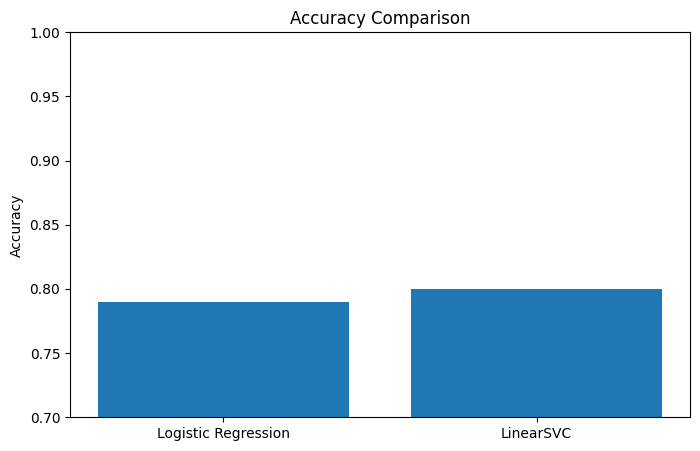

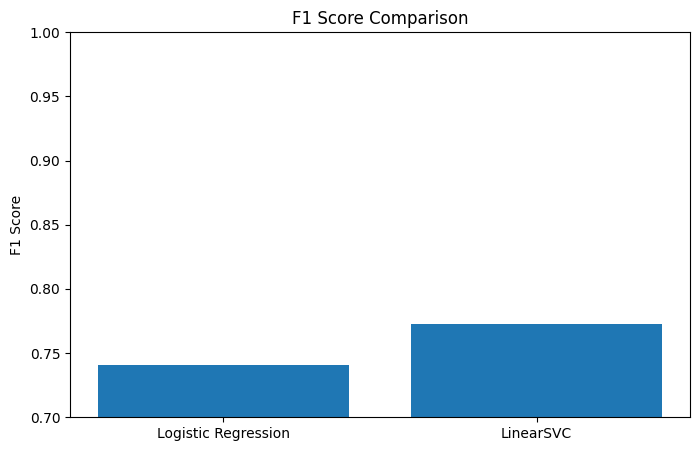

In [12]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'LinearSVC']
accuracy = [acc_lr, acc_svm]
f1_scores = [f1_lr, f1_svm]

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.show()

# Plot F1 Score
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores)
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0.7, 1.0)
plt.show()


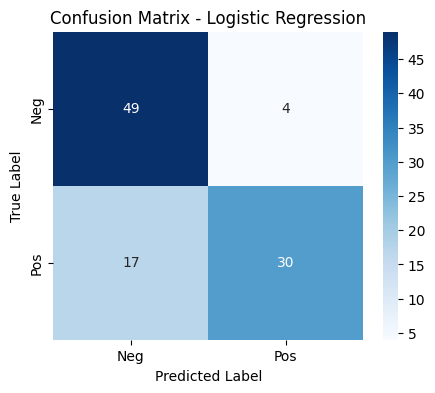

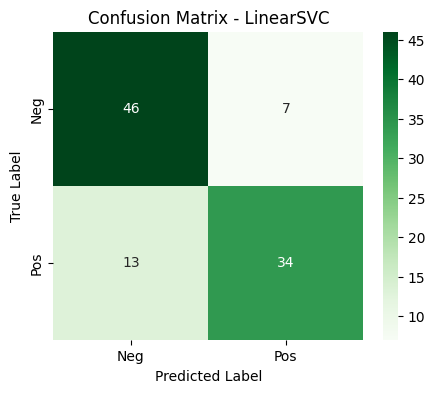

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion matrix for LinearSVC
cm_svm = confusion_matrix(y_test, y_pred_fast_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.title('Confusion Matrix - LinearSVC')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 10000    # Top 10,000 words in vocab
max_len = 200        # Max review length (in words)

# Tokenize text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),  # Removed input_length
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(
    X_train_pad, y_train,
    epochs=2,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 775ms/step - accuracy: 0.4800 - loss: 0.6936 - val_accuracy: 0.5750 - val_loss: 0.6924
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.6937 - loss: 0.6873 - val_accuracy: 0.5125 - val_loss: 0.6922


In [17]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Predict probabilities
y_pred_probs = model.predict(X_test_pad)

# Convert to class labels (0 or 1)
y_pred_lstm = (y_pred_probs > 0.5).astype(int).flatten()

# Evaluate
print("LSTM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("F1 Score:", f1_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
LSTM Results
Accuracy: 0.57
F1 Score: 0.18867924528301888
              precision    recall  f1-score   support

           0       0.55      0.98      0.71        53
           1       0.83      0.11      0.19        47

    accuracy                           0.57       100
   macro avg       0.69      0.54      0.45       100
weighted avg       0.68      0.57      0.46       100



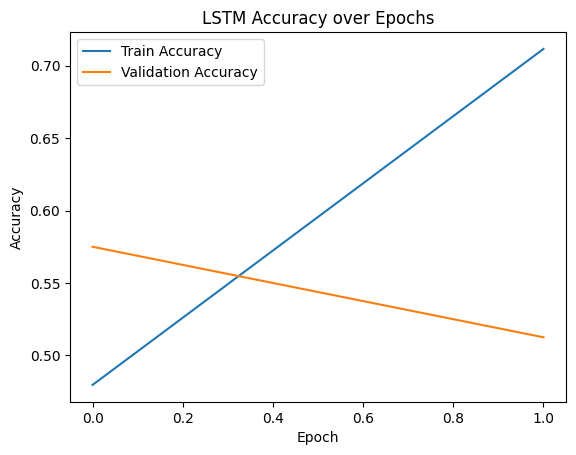

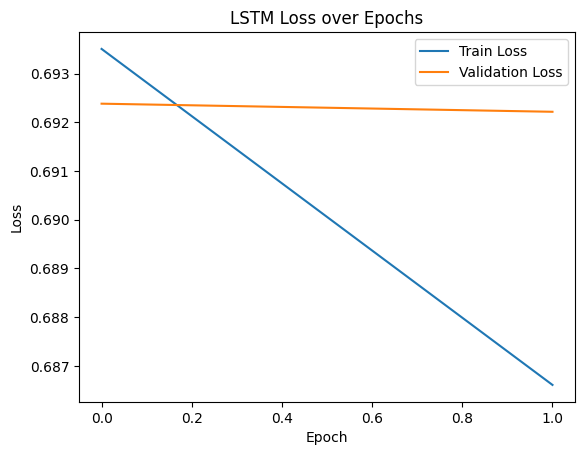

In [18]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# LinearSVC
acc_svm = accuracy_score(y_test, y_pred_fast_svm)
f1_svm = f1_score(y_test, y_pred_fast_svm)

# LSTM
acc_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)


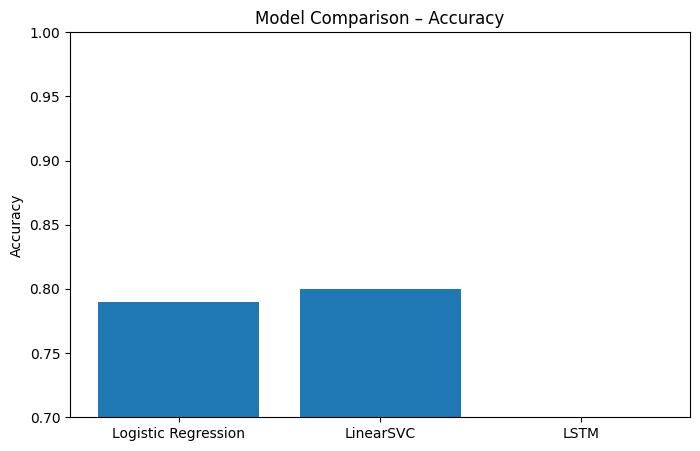

In [20]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'LinearSVC', 'LSTM']
accuracy = [acc_lr, acc_svm, acc_lstm]
f1_scores = [f1_lr, f1_svm, f1_lstm]

# Accuracy Plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy)
plt.title('Model Comparison – Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()


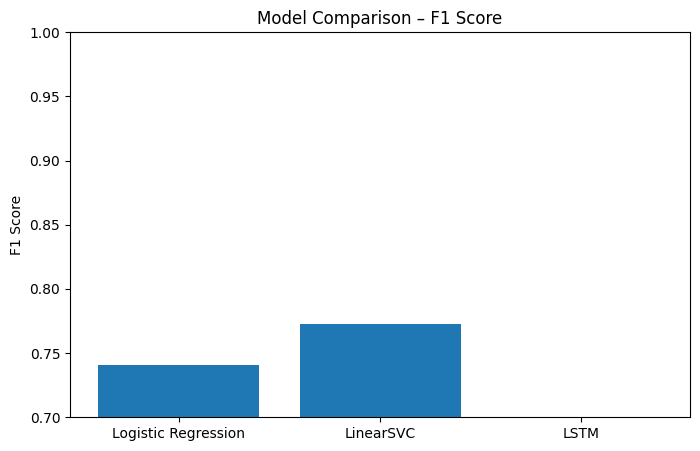

In [21]:
# F1 Score Plot
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores)
plt.title('Model Comparison – F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0.7, 1.0)
plt.show()


In [22]:
!pip install transformers datasets --quiet

In [24]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize function
def tokenize_texts(texts, max_len=128):
    return tokenizer(
        list(texts),
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='pt'
    )

train_encodings_small = tokenize_texts(texts=X_train)
test_encodings = tokenize_texts(X_test)  # OK to keep this for full test set


In [25]:
import torch

In [27]:
# Define the dataset class if not already done
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels.tolist())

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()} | {'labels': self.labels[idx]}

    def __len__(self):
        return len(self.labels)

# ✅ Correct usage with SMALL train set
train_dataset_small = IMDbDataset(train_encodings_small, y_train)

# ✅ And full test set (still fine)
test_dataset = IMDbDataset(test_encodings, y_test)


In [28]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    logging_dir='./logs',
    report_to=[]  # 👈 disables W&B, TensorBoard, etc.
)


In [31]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_small,
    eval_dataset=test_dataset,
)

trainer.train()


Step,Training Loss


TrainOutput(global_step=50, training_loss=0.62030517578125, metrics={'train_runtime': 1091.497, 'train_samples_per_second': 0.731, 'train_steps_per_second': 0.046, 'total_flos': 52490655544320.0, 'train_loss': 0.62030517578125, 'epoch': 2.0})

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predict on test set
preds_output = trainer.predict(test_dataset)
y_pred_bert = np.argmax(preds_output.predictions, axis=1)

# Evaluate
acc_bert = accuracy_score(y_test, y_pred_bert)
f1_bert = f1_score(y_test, y_pred_bert)

print("BERT Accuracy:", acc_bert)
print("BERT F1 Score:", f1_bert)
print("\nClassification Report:\n", classification_report(y_test, y_pred_bert))


BERT Accuracy: 0.68
BERT F1 Score: 0.7377049180327869

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59        53
           1       0.60      0.96      0.74        47

    accuracy                           0.68       100
   macro avg       0.76      0.70      0.66       100
weighted avg       0.77      0.68      0.66       100



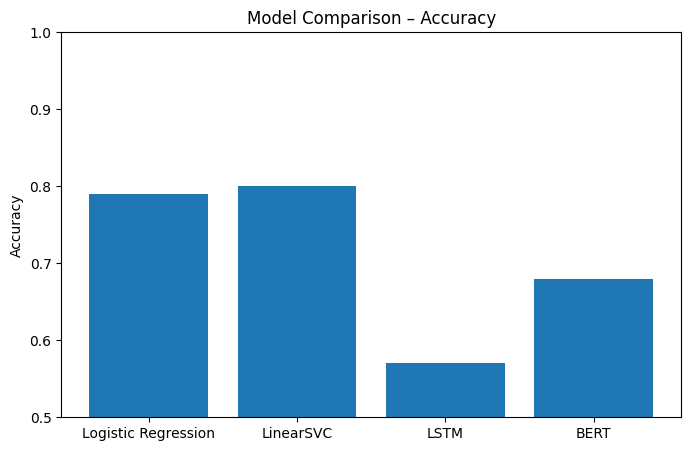

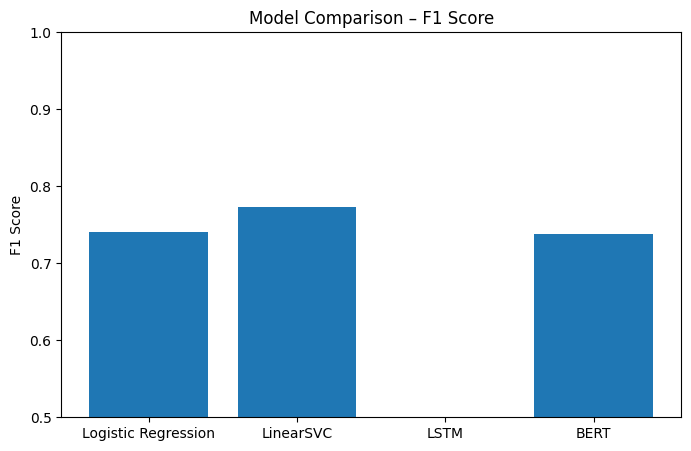

In [33]:
models.append("BERT")
accuracy.append(acc_bert)
f1_scores.append(f1_bert)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy)
plt.title('Model Comparison – Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()

# Plot F1 Score
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores)
plt.title('Model Comparison – F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0.5, 1.0)
plt.show()
